# **How to Scale or Normalize Data**

---

## **1. Introduction to Scaling and Normalization**

### Why Scaling is Critical:
Scaling ensures that machine learning algorithms perform optimally by standardizing the feature magnitudes. Some models are sensitive to feature scales:
1. **Gradient-Based Models**: Faster convergence during optimization.
2. **Distance-Based Models**: Models like KNN and SVM rely on distance metrics, which can be skewed by large feature values.

### Difference Between Scaling and Normalization:
1. **Scaling**:
   - Adjusts data to a specific range (e.g., 0–1 or z-score).
   - Maintains feature distributions.
   - Common methods: StandardScaler, MinMaxScaler.
2. **Normalization**:
   - Adjusts data to a unit norm (length of the vector = 1).
   - Often used in sparse data or clustering.

---

## **2. Scaling Techniques**

### **2.1 StandardScaler**
- **What it does**: Standardizes features by removing the mean and scaling to unit variance.
- **Formula**:
  $
  z = \frac{x - \mu}{\sigma}
  $
  Where:
  - $(x)$: Original value.
  - $(\mu)$: Mean of the feature.
  - $(\sigma):$ Standard deviation of the feature.

- **When to use**: Gradient-based models (Logistic Regression, SVM) and KNN.

---

### **2.2 MinMaxScaler**
- **What it does**: Scales features to a specific range, usually $([0, 1])$.
- **Formula**:
  $
  x' = \frac{x - x_{min}}{x_{max} - x_{min}}
  $
  Where:
  - $(x_{min})$: Minimum value of the feature.
  - $(x_{max})$: Maximum value of the feature.

- **When to use**: Neural networks or models sensitive to input magnitudes.

---

### **2.3 RobustScaler**
- **What it does**: Uses the median and interquartile range (IQR) for scaling.
- **When to use**: Datasets with many outliers.

---

### **2.4 Comparing Techniques Visually**

Below, we apply different scaling methods to a synthetic dataset and compare the results visually.

---

### **3. Implementation**

#### **Dataset Overview**

In [1]:
import pandas as pd
import numpy as np

# Create a synthetic dataset
data = {
    "Feature_A": np.random.randint(1, 100, 50),  # Feature with high values
    "Feature_B": np.random.uniform(0.1, 1.0, 50),  # Feature with small values
    "Feature_C": np.random.normal(50, 10, 50),  # Feature with normal distribution
}
df = pd.DataFrame(data)
df.head()

,Feature_A,Feature_B,Feature_C
0,74,0.197761,58.886454
1,41,0.757659,44.895033
2,98,0.966197,46.293994
3,61,0.524129,55.067552
4,34,0.378569,50.946654


---

#### **Scaling the Dataset**

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [3]:
# Apply StandardScaler
scaler_standard = StandardScaler()
df_scaled_standard = pd.DataFrame(scaler_standard.fit_transform(df), columns=df.columns)

In [4]:
# Apply MinMaxScaler
scaler_minmax = MinMaxScaler()
df_scaled_minmax = pd.DataFrame(scaler_minmax.fit_transform(df), columns=df.columns)

In [5]:
# Apply RobustScaler
scaler_robust = RobustScaler()
df_scaled_robust = pd.DataFrame(scaler_robust.fit_transform(df), columns=df.columns)

---

#### **Visualizing the Scaling Results**

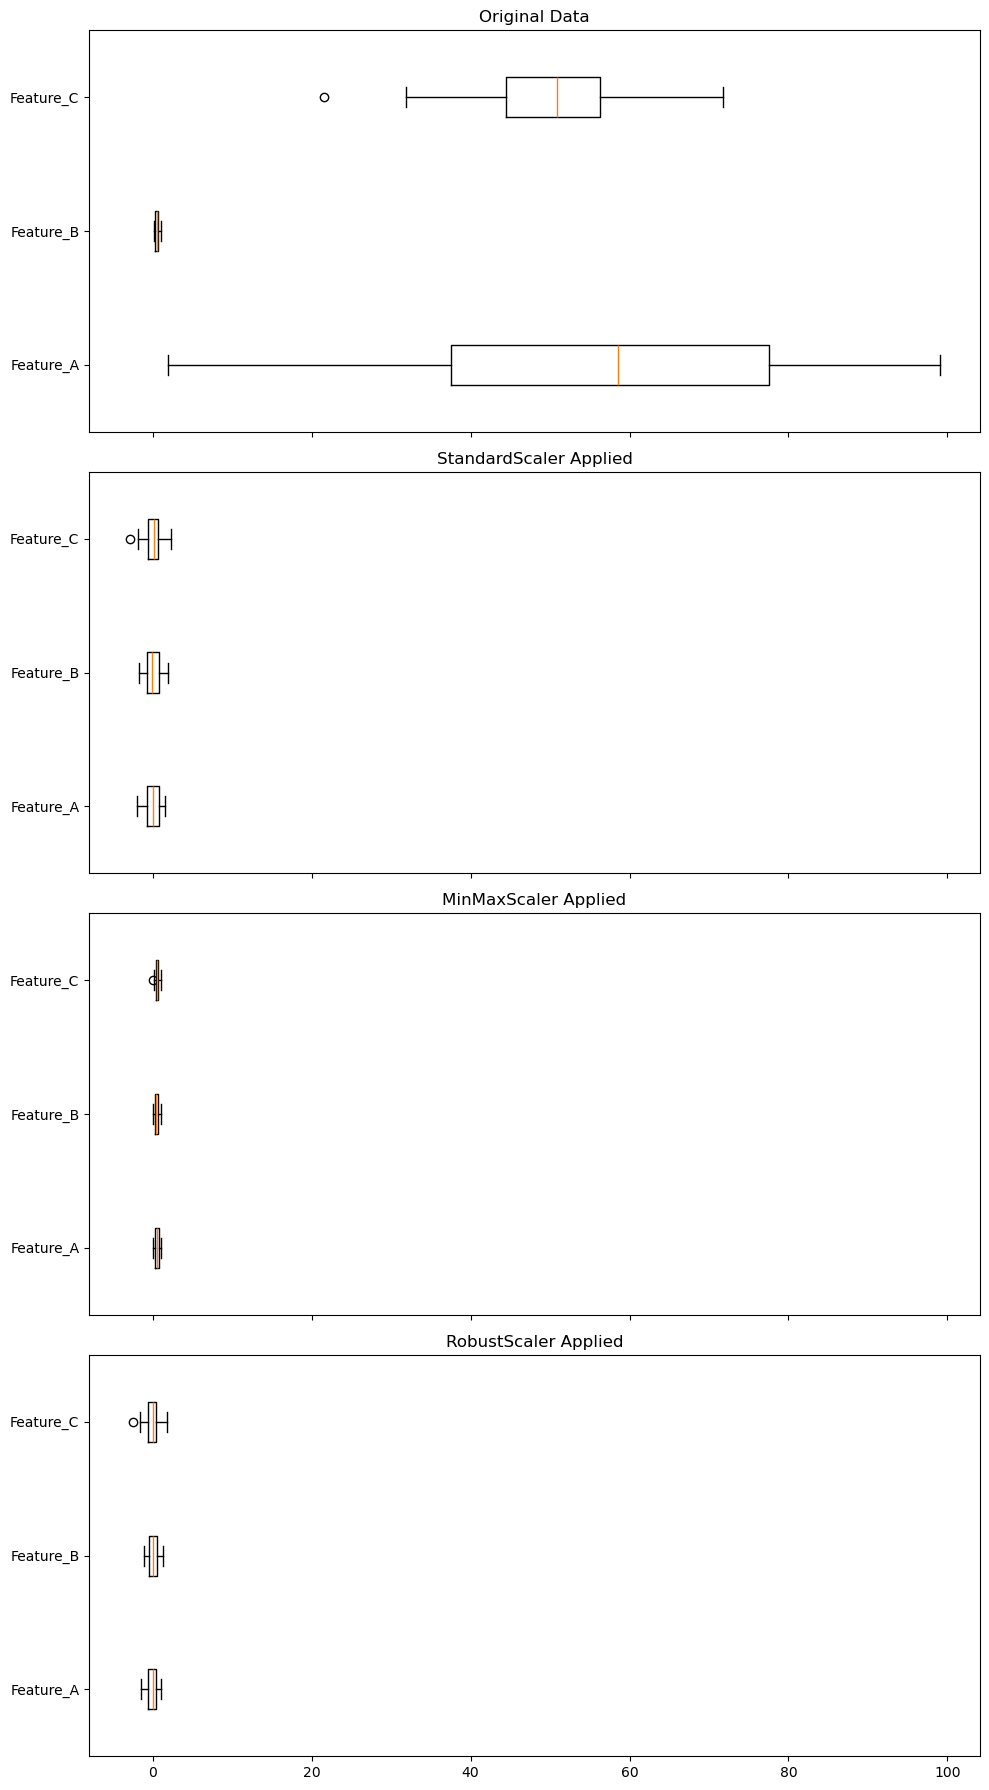

In [6]:
import matplotlib.pyplot as plt

# Visualize original and scaled data
fig, axes = plt.subplots(4, 1, figsize=(10, 18), sharex=True)

# Original data
axes[0].boxplot(df.values, vert=False, labels=df.columns)
axes[0].set_title("Original Data")

# Standard Scaled data
axes[1].boxplot(df_scaled_standard.values, vert=False, labels=df.columns)
axes[1].set_title("StandardScaler Applied")

# MinMax Scaled data
axes[2].boxplot(df_scaled_minmax.values, vert=False, labels=df.columns)
axes[2].set_title("MinMaxScaler Applied")

# Robust Scaled data
axes[3].boxplot(df_scaled_robust.values, vert=False, labels=df.columns)
axes[3].set_title("RobustScaler Applied")

plt.tight_layout()
plt.show()

---

## **4. Choosing the Right Method**

### **Guidelines**:
| **Scaler**         | **Use Case**                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| **StandardScaler**  | Gradient-based models (Logistic Regression, SVM), KNN.                     |
| **MinMaxScaler**    | Neural networks, tree-based models.                                        |
| **RobustScaler**    | Data with many outliers; resistant to their influence.                     |

---

## **5. Effect of Scaling on Models**

### Example: KNN Before and After Scaling

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
# Example dataset for classification
df_classification = pd.DataFrame({
    "Feature_A": np.random.randint(1, 100, 10000),
    "Feature_B": np.random.uniform(0.1, 10, 10000),
    "Target": np.random.choice([0, 1], 10000)
})

In [9]:
X = df_classification[["Feature_A", "Feature_B"]]
y = df_classification["Target"]

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# KNN without scaling
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy without scaling:", accuracy_score(y_test, y_pred))

Accuracy without scaling: 0.496


In [12]:
# KNN with scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
knn.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)
print("Accuracy with scaling:", accuracy_score(y_test, y_pred_scaled))

Accuracy with scaling: 0.5095


---

## **6. Summary**

- Scaling ensures uniform feature magnitudes, which is critical for many machine learning models.
- The choice of scaler depends on the data's characteristics and the model's requirements.
- Visual comparisons help identify how scaling methods transform feature distributions.

---
---